In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train=y_train.reshape(-1,)
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

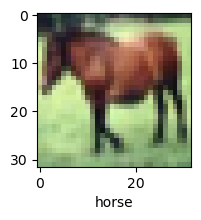

In [8]:
plot_sample(x_train,y_train,7)

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

# using simple neural network

In [11]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.8117 - accuracy: 0.3573
Epoch 2/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6231 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5441 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4838 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.4351 - accuracy: 0.4941


In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 8s 22ms/step - loss: 1.4790 - accuracy: 0.4610


[1.4789881706237793, 0.460999995470047]

In [13]:
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 22ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.64      0.55      1000
           1       0.69      0.49      0.57      1000
           2       0.31      0.48      0.38      1000
           3       0.41      0.14      0.21      1000
           4       0.54      0.19      0.28      1000
           5       0.30      0.60      0.40      1000
           6       0.58      0.40      0.48      1000
           7       0.51      0.60      0.55      1000
           8       0.75      0.43      0.55      1000
           9       0.51      0.64      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [14]:
cnn_model = keras.models.Sequential([
        #cnn
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
    
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
    
        #Dense
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])

cnn_model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 2.0200 - accuracy: 0.2639
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.6188 - accuracy: 0.4243
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4364 - accuracy: 0.4884
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3277 - accuracy: 0.5316
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2401 - accuracy: 0.5631
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1722 - accuracy: 0.5909
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1129 - accuracy: 0.6108
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0619 - accuracy: 0.6284
Epoch 9/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.0196 - accuracy: 0.6464
Epoch 10/10
1563/1563 [==============================] - 63s 40m

In [15]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.0365 - accuracy: 0.6400


[1.0364588499069214, 0.6399999856948853]

In [16]:
y_test = y_test.reshape(-1,)

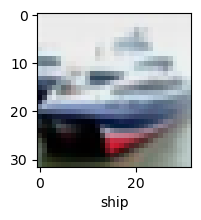

In [17]:
plot_sample(x_test,y_test,1)

In [18]:
y_pred = cnn_model.predict(x_test)
y_pred[:3]

313/313 [==============================] - 3s 10ms/step


array([[3.32307369e-02, 2.33297213e-03, 9.23765004e-02, 5.83069563e-01,
        2.16175765e-02, 2.10245833e-01, 1.62597280e-02, 4.71792975e-03,
        3.46441939e-02, 1.50495477e-03],
       [6.74363077e-02, 2.32842505e-01, 2.19239719e-05, 1.16405245e-05,
        4.05384671e-05, 6.18127785e-07, 7.07925039e-07, 5.18297884e-06,
        6.76256537e-01, 2.33840868e-02],
       [2.79971454e-02, 5.88338971e-02, 3.11464886e-04, 8.33376602e-04,
        4.09956730e-04, 1.33891052e-04, 1.39843309e-04, 3.03711626e-04,
        8.87318611e-01, 2.37181280e-02]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:3]

[3, 8, 8]

In [20]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

In [21]:
classes[y_classes[1]]

'ship'

In [22]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.71      0.81      0.75      1000
           2       0.58      0.46      0.51      1000
           3       0.47      0.40      0.43      1000
           4       0.53      0.64      0.58      1000
           5       0.51      0.59      0.55      1000
           6       0.82      0.63      0.72      1000
           7       0.69      0.71      0.70      1000
           8       0.69      0.81      0.74      1000
           9       0.75      0.65      0.69      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000

